# Business Intelligence Analysis
___

In [217]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#seaborn styling
sns.set(style="whitegrid")

In [225]:
df = pd.read_csv("main_df.csv",low_memory=False)

In [226]:
df.timestamp = pd.to_datetime(df.timestamp)

In [227]:
df.head()

,acn,trans_id,timestamp,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
0,11,37777,2015-08-12 16:03:00,Core Power,Beverage,2.80,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
1,11,38361,2015-08-21 08:02:00,Berries Amore,Beverage,4.28,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2,11,38360,2015-08-21 08:02:00,Smoothie Add-On,Beverage,0.67,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
3,11,35130,2015-07-24 11:53:00,$2.00 Ice Cream,Food & Consumables,2.00,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
4,11,35131,2015-07-24 11:53:00,$2.00 Ice Cream,Food & Consumables,2.00,Misc. Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar


In [239]:
dft = df.sort_values("timestamp").set_index("timestamp")

## What's the dollar value per month/year per membership type

In [252]:
dft.groupby("membership").resample("Y")[["total"]].sum()

total
membership                timestamp            
General Family Membership 2015-12-31  588810.39
                          2016-12-31  617225.31
                          2017-12-31  646217.50
                          2018-12-31  727211.36
                          2019-12-31  786336.45
General Property Owner    2015-12-31   86122.27
                          2016-12-31  105687.56
                          2017-12-31  108568.36
                          2018-12-31  112082.36
                          2019-12-31  133929.36
General Single Membership 2015-12-31   98014.72
                          2016-12-31  120319.47
                          2017-12-31  143022.74
                          2018-12-31  174165.52
                          2019-12-31  192511.30
Guest                     2015-12-31   56773.24
                          2016-12-31   36161.31
                          2017-12-31   34931.21
                          2018-12-31   55521.34
                          2019-12-31   78350.89
Misc. Membership          2015-12-31   11300.56
                          2016-12-31   10564.82
                          2017-12-31   11488.71
                          2018-12-31   11343.70
                          2019-12-31   14509.63
ND Owner Membership       2015-12-31    4217.65
                          2016-12-31    2610.06
                          2017-12-31    1656.75
                          2018-12-31    4010.32
                          2019-12-31    5753.95
Premier Family Membership 2015-12-31  103394.31
                          2016-12-31   83403.44
                          2017-12-31   83082.73
                          2018-12-31   84426.36
                          2019-12-31   82638.87
Premier Single Membership 2015-12-31   11946.21
                          2016-12-31   10488.84
                          2017-12-31   14275.17
                          2018-12-31   16476.12
                          2019-12-31   17967.87
Veramendi Teacher         2019-12-31     889.35

In [257]:
dft.groupby("membership").resample("Y")[["total"]].mean()

total
membership                timestamp            
General Family Membership 2015-12-31  44.515793
                          2016-12-31  50.650362
                          2017-12-31  49.728165
                          2018-12-31  39.541698
                          2019-12-31  35.372760
General Property Owner    2015-12-31  23.537106
                          2016-12-31  28.789856
                          2017-12-31  26.351544
                          2018-12-31  22.762461
                          2019-12-31  22.976387
General Single Membership 2015-12-31  44.370629
                          2016-12-31  50.258759
                          2017-12-31  49.574607
                          2018-12-31  38.910974
                          2019-12-31  37.643977
Guest                     2015-12-31  61.844488
                          2016-12-31  33.732565
                          2017-12-31  36.500742
                          2018-12-31  37.063645
                          2019-12-31  46.306673
Misc. Membership          2015-12-31  22.466322
                          2016-12-31  27.158920
                          2017-12-31  23.162722
                          2018-12-31  16.416353
                          2019-12-31  14.423091
ND Owner Membership       2015-12-31  10.237015
                          2016-12-31   7.744985
                          2017-12-31   4.100866
                          2018-12-31   5.134853
                          2019-12-31   9.954931
Premier Family Membership 2015-12-31  41.927944
                          2016-12-31  48.405943
                          2017-12-31  49.016360
                          2018-12-31  50.283716
                          2019-12-31  38.082429
Premier Single Membership 2015-12-31  31.109922
                          2016-12-31  34.962800
                          2017-12-31  36.048409
                          2018-12-31  35.055574
                          2019-12-31  28.840883
Veramendi Teacher         2019-12-31  52.314706

## What is driving Sales at JNCC

### Summary of Insights

1. Monthly membership is the primary driver of sales.
2. Between 2018-2019, there's a high increase in sales from Gen Family, Gen Single members.
    - Same trend is true for Premier Family Membership, Misc. Membership
    - While Gen Property Owner member sales dropped in 2018 fiscal year

In [230]:
df[df.category == "Program"].total.describe()

count    1060.000000
mean      150.983943
std        91.658046
min         0.010000
25%        60.000000
50%       160.000000
75%       225.000000
max      1232.800000
Name: total, dtype: float64

In [231]:
df[(df.category == "Program") & (df.item_group== "Teen Performance Camp")].total.min()

18.5

In [232]:
df[df.category=="Admin"].item_group.unique()

array(['Guest Fee', 'Membership Dues', 'Food Allowance',
       'Membership Initiation', 'Homeowner Membership Initiation',
       'Facility Rental', 'Sponsorship'], dtype=object)

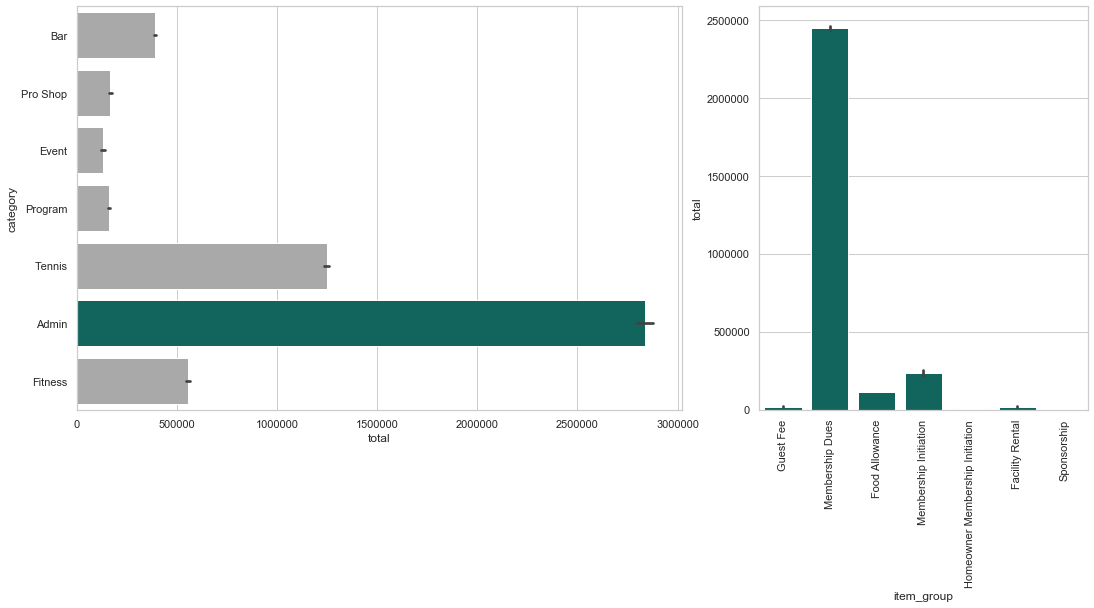

In [233]:
fig = plt.figure(figsize=(12,7))

ax1 = fig.add_axes([0.1,0.1,0.7,0.8])
ax2 = fig.add_axes([0.89,0.1,0.38,0.8])

# ax1
fig1 = sns.barplot(x="total",y="category",data=df,palette=["darkgray","darkgray","darkgray","darkgray","darkgray","#037367"],ax=ax1,estimator=sum)
# ax2
fig2 = sns.barplot(x="item_group",y="total",data=df[df.category == "Admin"],color="#037367",ax=ax2,estimator=sum)

ax2.set_xticklabels(labels=list(df[df.category == "Admin"].item_group.unique()),rotation = 90)
plt.show()

### All Product Categories Except Memberships

In [234]:
category_list = ["Bar","Tennis","Pro Shop", "Program", "Fitness", "Event"]

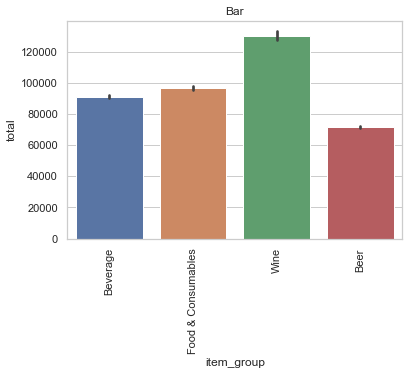

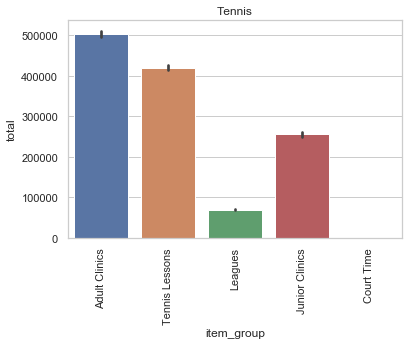

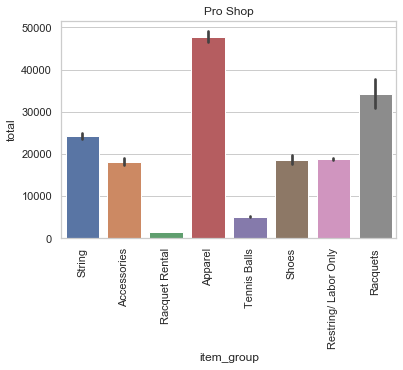

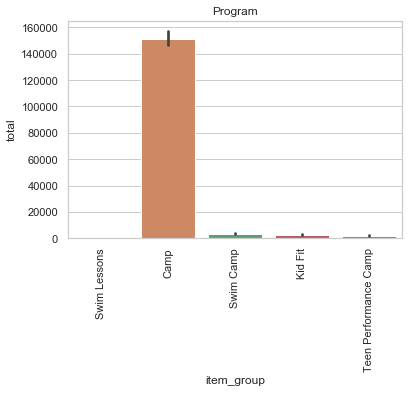

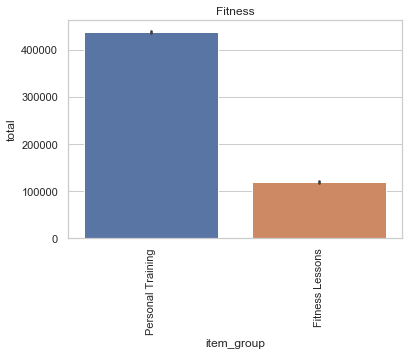

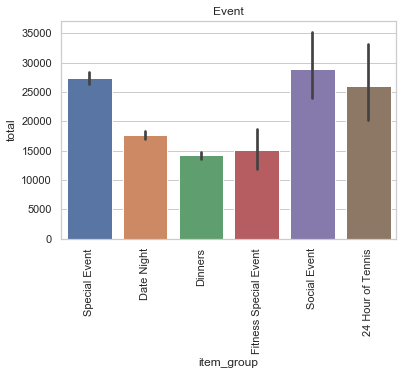

In [238]:
for cat in category_list:
    ax = sns.barplot(data=df[df["category"] == cat], x=df["item_group"][df["category"]== cat], y="total",estimator=sum)
    
    plt.title(cat)
    ax.set_xticklabels(labels=list(df[df["category"] == cat].item_group.unique()),rotation = 90)
    plt.show()

### Zooming In On Memberships

In [116]:
membership = df[df.category=="Admin"].sort_values("timestamp").set_index("timestamp")

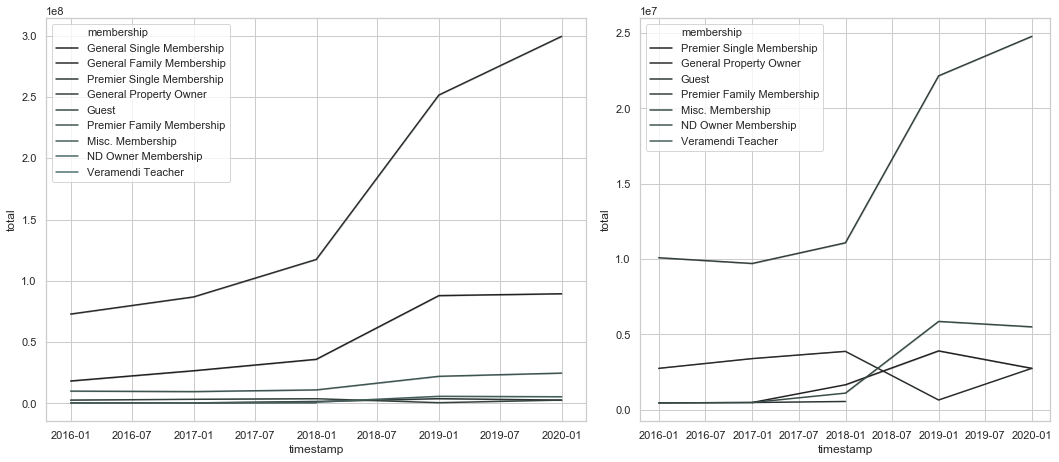

In [150]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_axes([0.1,0.1,0.5,0.8])
ax2 = fig.add_axes([0.65,0.1,0.38,0.8])

# ax1
fig1 =  sns.lineplot(x=membership.index,y=membership.total.resample("Y").sum(),hue="membership",data=membership, estimator=sum,ax=ax1)
# ax2
fig2 =  sns.lineplot(x=membership[~membership.membership.isin(["General Single Membership","General Family Membership"])].index,y=membership.total.resample("Y").sum(),hue="membership",data=membership[~membership.membership.isin(["General Single Membership","General Family Membership"])], estimator=sum,ax=ax2)

plt.show()


### Sales patterns of Gen Family and Gen Single members

What is the monthly spending of GF and GS members?

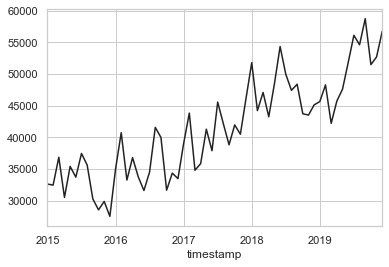

In [162]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").sum().plot()

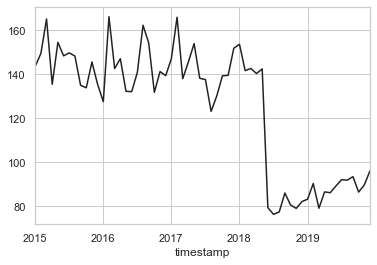

In [165]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").mean().plot()

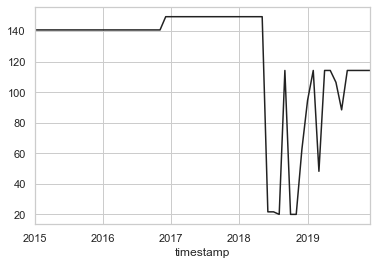

In [164]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").median().plot()

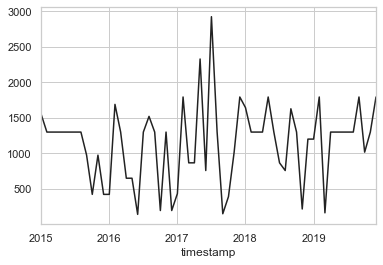

In [166]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").max().plot()

> It seems like the average membership cost per month dropped in the early half of 2018. Policy changes?

In [171]:
dg = dfdt[dfdt.membership.isin(["General Family Membership","General Single Membership"])]

In [176]:
dg.head()

,acn,trans_id,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
timestamp,,,,,,,,,,,,,
2015-01-01 00:00:00,464,8195,Membership for &quot;1 HR MONTHLY GENERAL EFT ...,Adult Clinics,75.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Bar
2015-01-02 10:56:00,188,8239,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,220.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis
2015-01-02 10:58:00,66,8240,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,220.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis
2015-01-02 11:02:00,671,8243,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,110.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis
2015-01-02 11:04:00,242,8245,LESSON 4 Pack - 1 on 1 (Tennis),Tennis Lessons,220.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Tennis


In [185]:
dg.category.unique()

array(['Bar', 'Tennis', 'Program', 'Pro Shop', 'Admin', 'Event',
       'Fitness'], dtype=object)

In [190]:
dg_bar = dg[dg.category == "Bar"]
dg_tennis = dg[dg.category == "Tennis"]
dg_program = dg[dg.category == "Program"]
dg_ps = dg[dg.category == "Pro Shop"]
dg_admin = dg[dg.category == "Admin"]
dg_event = dg[dg.category == "Event"]
dg_fitness = dg[dg.category == "Fitness"]

In [197]:
dg_program

,acn,trans_id,item,item_group,total,membership,group,city,state,zipcode,lat,long,category
timestamp,,,,,,,,,,,,,
2015-01-02 15:43:00,599,8282,Holiday Camp,Camp,120.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program
2015-01-02 15:45:00,312,8283,Holiday Camp,Camp,120.0,General Single Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program
2015-01-02 15:47:00,476,8284,Holiday Camp,Camp,120.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program
2015-01-02 15:49:00,1245,8285,Holiday Camp,Camp,120.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program
2015-01-02 15:53:00,1229,8287,Holiday Camp,Camp,120.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program
2015-01-02 16:14:00,690,8289,Holiday Camp Daily,Camp,40.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program
2015-04-15 10:31:00,1346,19908,Pee Wee Camp 2015 | Pee Wee Session 3 | Full W...,Camp,225.0,General Family Membership,General Family Membership,NEW BRAUNFELS,TX,78130.0,29.703231,-98.120814,Program
2015-04-15 10:32:00,1345,19910,Sports Camp 2015 | Sports Camp Session 3 | Ful...,Camp,225.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program
2015-04-16 14:10:00,875,20018,Sports Camp 2015 | Sports Camp Session 9 | Ful...,Camp,210.0,General Family Membership,NaN,NaN,NaN,NaN,NaN,NaN,Program


[Text(0.5, 1.0, 'Event Sales')]

<Figure size 1152x504 with 0 Axes>

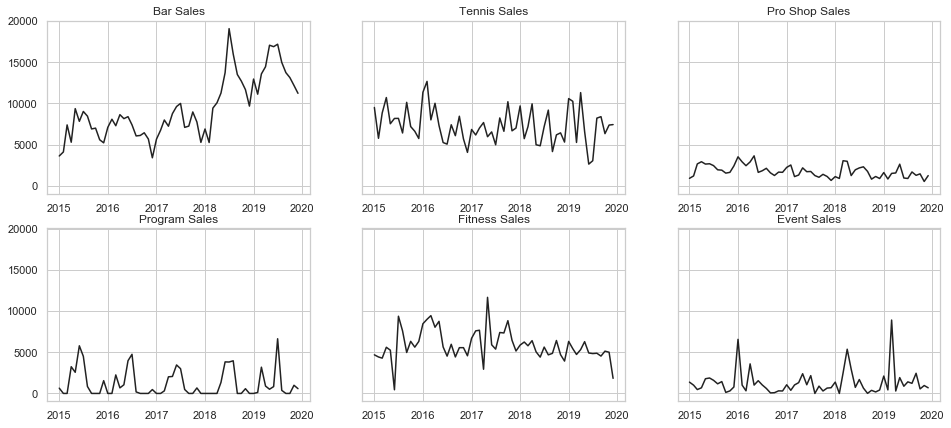

In [205]:
plt.figure(figsize=(16,7))
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(2,3,figsize=(16,7),sharey=True)

ax1.plot(dg_bar.total.resample("MS").sum())
ax1.set(title="Bar Sales")

ax2.plot(dg_tennis.total.resample("MS").sum())
ax2.set(title="Tennis Sales")

ax3.plot(dg_ps.total.resample("MS").sum())
ax3.set(title="Pro Shop Sales")

ax4.plot(dg_program.total.resample("MS").sum())
ax4.set(title="Program Sales")

ax5.plot(dg_fitness.total.resample("MS").sum())
ax5.set(title="Fitness Sales")

ax6.plot(dg_event.total.resample("MS").sum())
ax6.set(title="Event Sales")
